<a href="https://colab.research.google.com/github/glf58/Projet_Covid/blob/GLF/get_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###on recupere les donnees sauvees des differents essais

In [12]:

path = '/content/drive/MyDrive/Colab Notebooks/covid/results/'

#ext = 'transfert_learning'
ext = 'lenet'

if ext == 'transfert_learning':
  names = ['MobileNet22560.2', 
           'MobileNetFineTune22560.2',
           'MobileNet22560.2HE', 
           'MobileNetFineTune22560.2HE',
           'VGG1622560.2',
           'VGG16FineTune22560.2']
elif ext == 'lenet':
  names = ['lenet2x32',
           'lenet2x32HE',
           'lenet2x32IA',
           'lenet2x32HEIA']
else:
  print('pas prevu, modifier le choix de sortie svp')
  

path_res = [path+name+'.npy' for name in names]
liste_res = {}
for name, mod in zip(names, path_res):
  liste_res[name] = np.load(mod, allow_pickle='TRUE').item()

# pour imprimer en gras et/ou en couleur
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#print(color.BOLD + color.RED + 'Hello World !' + color.END)

### affichage des courbes d'entrainement

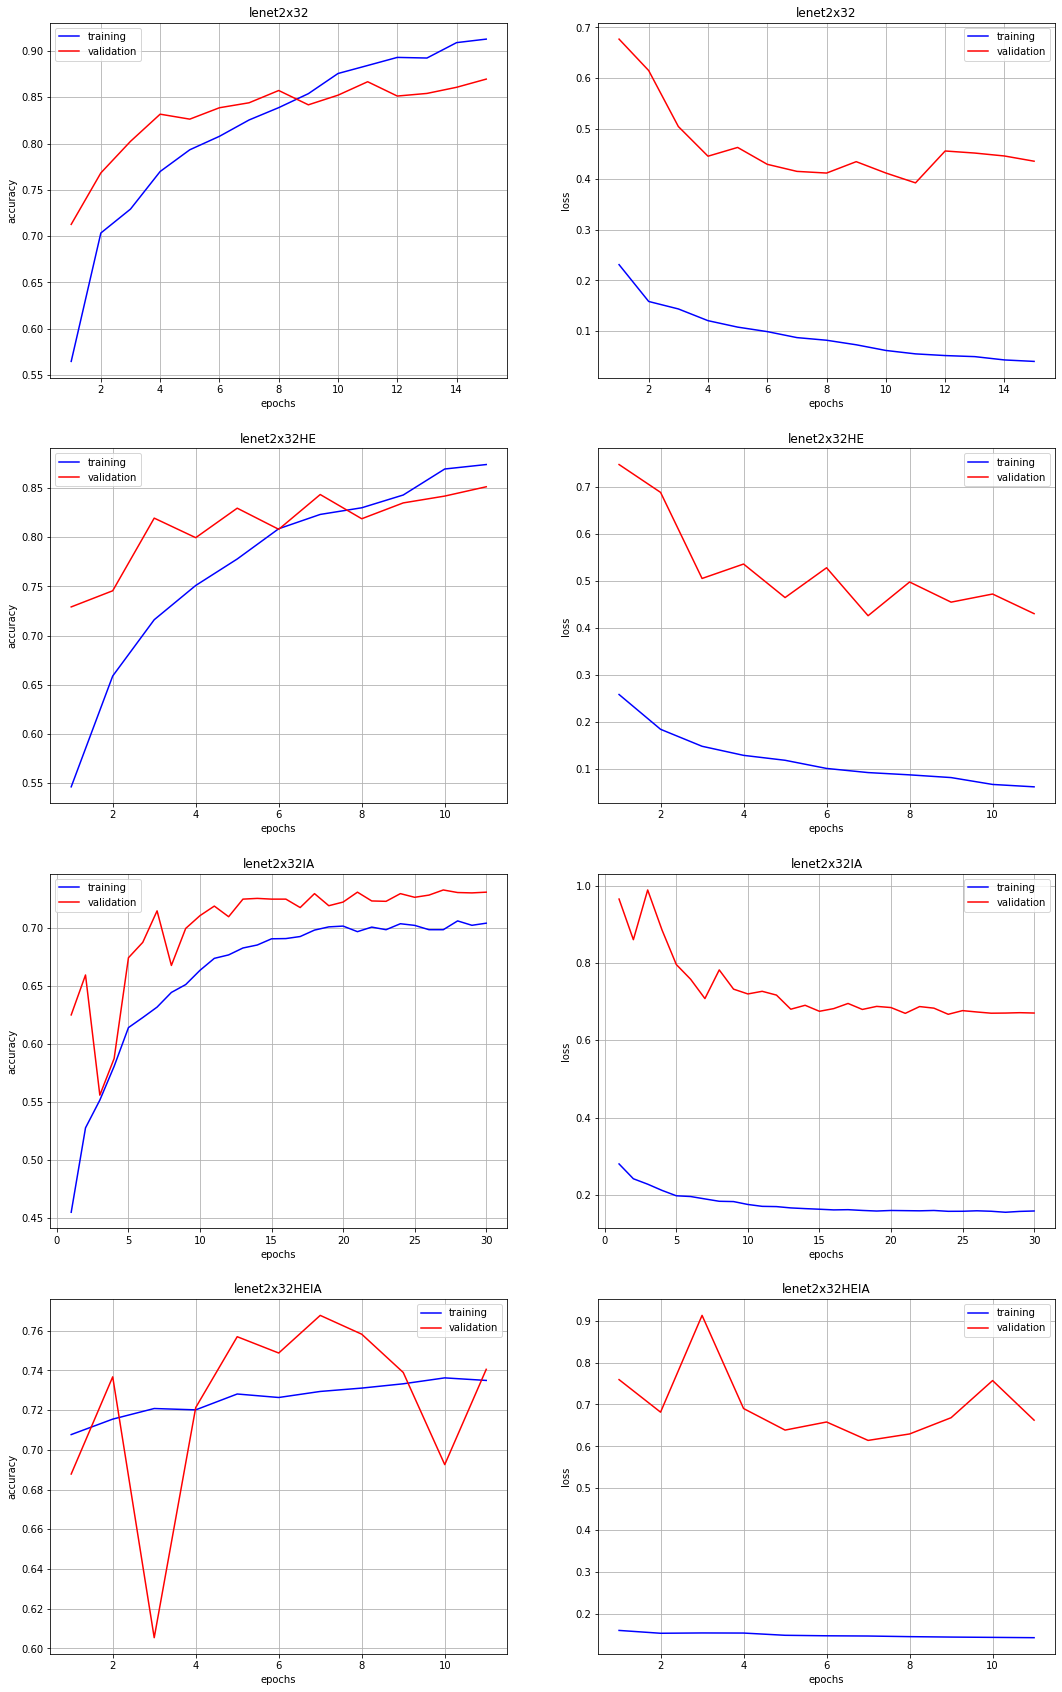

In [13]:
n_mods = len(names)
fig, axs = plt.subplots(n_mods, 2, figsize=(18,30))

for row in range(len(names)):
  hist = liste_res[names[row]]['hist']
  epochs = len(hist['accuracy'])
  axs[row, 0].plot(np.arange(1,epochs+1,1), hist['accuracy'], 'blue', label='training')
  axs[row, 0].plot(np.arange(1,epochs+1,1), hist['val_accuracy'], 'r', label='validation')
  axs[row, 0].set_xlabel('epochs')
  axs[row, 0].set_ylabel('accuracy')
  axs[row, 0].legend()
  axs[row, 0].grid()
  axs[row, 0].set_title(names[row])
  
  axs[row, 1].plot(np.arange(1,epochs+1,1), hist['loss'], 'blue', label='training')
  axs[row, 1].plot(np.arange(1,epochs+1,1), hist['val_loss'], 'r', label='validation')
  axs[row, 1].set_xlabel('epochs')
  axs[row, 1].set_ylabel('loss')
  axs[row, 1].legend()
  axs[row, 1].grid()
  axs[row, 1].set_title(names[row])

fig.savefig(path+ext+'_compare_convergence.png')

### affichage des classification report et des scores sur l'ensemble de test

In [14]:
for name in names:
  cr = liste_res[name]['cr']
  print("Accuracy on test data for modele "+color.BOLD+str(name)+color.END+" is "+color.BOLD+color.RED+str(cr.split()[25])+color.END)
  #print("Accuracy on test data for modele: {} is {}".format(name, cr.split()[25]))
  print(cr)

Accuracy on test data for modele lenet2x32 is 0.87
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       542
           1       0.84      0.81      0.82       901
           2       0.88      0.90      0.89      1528
           3       0.93      0.94      0.93       201

    accuracy                           0.87      3172
   macro avg       0.88      0.88      0.88      3172
weighted avg       0.87      0.87      0.87      3172

Accuracy on test data for modele lenet2x32HE is 0.84
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       542
           1       0.81      0.78      0.80       901
           2       0.89      0.85      0.87      1528
           3       0.86      0.93      0.89       201

    accuracy                           0.84      3172
   macro avg       0.83      0.85      0.84      3172
weighted avg       0.84      0.84      0.84      3172

Accuracy on test data for 

### affichons les matrices de confusion

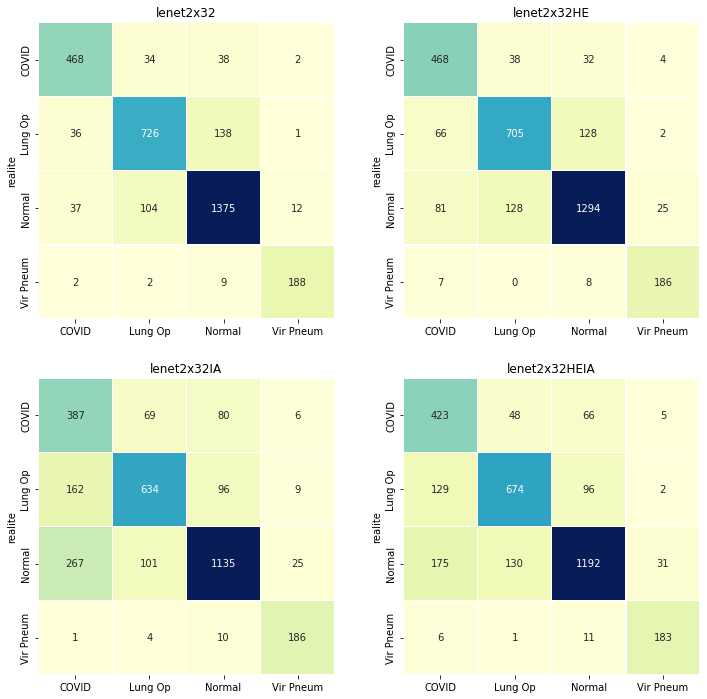

In [17]:
n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12,12))
d = {0: 'COVID', 1: 'Lung Op', 2: 'Normal', 3: 'Vir Pneum'}
for i in range(n_mods):
  z = liste_res[names[i]]['confusion_matrix']
  z.columns=d.values()
  z = z.reset_index()
  z['realite'] = z['realite'].replace(d)
  z = z.set_index('realite')
  g = sns.heatmap(data=z, cbar = False, cmap="YlGnBu", fmt='d', linewidths=.5, square=True, annot=True, ax=axs[i//n_cols, i -n_cols*(i//n_cols)])
  g.set_title(str(names[i]));

fig.savefig(path+ext+'compare_conf_matrix.png')

### essais divers

In [ ]:
new_dict1 = np.load('/content/drive/MyDrive/Colab Notebooks/covid/modeles/lenet2x32-11200data-(299, 299).npy', allow_pickle='TRUE').item()
new_dict2 = np.load('/content/drive/MyDrive/Colab Notebooks/covid/modeles/lenet2x32-11200data-(75, 75).npy', allow_pickle='TRUE').item()
new_dict3 = np.load('/content/drive/MyDrive/Colab Notebooks/covid/modeles/lenet2x32-2000data-(299, 299).npy', allow_pickle='TRUE').item()
new_dict4 = np.load('/content/drive/MyDrive/Colab Notebooks/covid/modeles/lenet2x32-2000data-(75, 75).npy', allow_pickle='TRUE').item()

cr1 = new_dict1['cr']
cr2 = new_dict2['cr']
cr3 = new_dict3['cr']
cr4 = new_dict4['cr']

print('11200 data 299x299: ', cr1)
print('11200 data 75x75: ', cr2)
print('2000 data 299x299: ', cr3)
print('2000 data 75x75: ', cr4)

11200 data 299x299:                precision    recall  f1-score   support

           0       0.83      0.84      0.83       542
           1       0.92      0.76      0.84       901
           2       0.45      0.12      0.19      1528
           3       0.13      0.96      0.23       201

    accuracy                           0.48      3172
   macro avg       0.58      0.67      0.52      3172
weighted avg       0.63      0.48      0.49      3172

11200 data 75x75:                precision    recall  f1-score   support

           0       0.84      0.82      0.83       542
           1       0.92      0.80      0.86       901
           2       0.51      0.12      0.20      1528
           3       0.13      0.98      0.23       201

    accuracy                           0.49      3172
   macro avg       0.60      0.68      0.53      3172
weighted avg       0.66      0.49      0.50      3172

2000 data 299x299:                precision    recall  f1-score   support

           0   

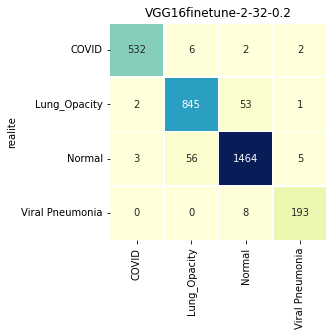

In [ ]:
def plot_confusion_matrix(indice, ax):
  d = {0: 'COVID', 1: 'Lung_Opacity', 2: 'Normal', 3: 'Viral Pneumonia'}
  z = liste_res[names[indice]]['confusion_matrix']
  z.columns=d.values()
  z = z.reset_index()
  z['realite'] = z['realite'].replace(d)
  z = z.set_index('realite')
  ax = sns.heatmap(data=z, cbar = False, cmap="YlGnBu", fmt='d', linewidths=.5, square=True, annot=True)
  ax.set_title(str(names[indice]));

f,a = plt.subplots(1,1)
plot_confusion_matrix(5, a)

In [ ]:
liste_res[names[0]]['confusion_matrix']

prediction,0,1,2,3
realite,,,,
0,468,34,38,2
1,36,726,138,1
2,37,104,1375,12
3,2,2,9,188


In [ ]:
z = liste_res[names[0]]['cr']
print(z.split())
print(z.split()[25])

['precision', 'recall', 'f1-score', 'support', '0', '0.86', '0.86', '0.86', '542', '1', '0.84', '0.81', '0.82', '901', '2', '0.88', '0.90', '0.89', '1528', '3', '0.93', '0.94', '0.93', '201', 'accuracy', '0.87', '3172', 'macro', 'avg', '0.88', '0.88', '0.88', '3172', 'weighted', 'avg', '0.87', '0.87', '0.87', '3172']
0.87
